Trying to embed this notebook in Wordpress blog following:
https://pythonandr.com/2016/07/18/sharing-ipython-jupyter-notebooks-via-wordpress/

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import time
import io
import requests

plt.style.use('dark_background')

In [17]:
#from https://chrisconlan.com/download-historical-stock-data-google-r-python/
def google_stocks(symbol, startdate = (1, 1, 2005), enddate = None):
 
    startdate = str(startdate[0]) + '+' + str(startdate[1]) + '+' + str(startdate[2])
 
    if not enddate:
        enddate = time.strftime("%m+%d+%Y")
    else:
        enddate = str(enddate[0]) + '+' + str(enddate[1]) + '+' + str(enddate[2])
 
    stock_url = "http://www.google.com/finance/historical?q=" + symbol + \
                "&startdate=" + startdate + "&enddate=" + enddate + "&output=csv"
 
    raw_response = requests.get(stock_url).content
 
    stock_data = pd.read_csv(io.StringIO(raw_response.decode('utf-8')))
 
    return stock_data

In [31]:
apple_data = google_stocks('AAPL')
apple_data.head()

,Date,Open,High,Low,Close,Volume
0,11-Oct-17,155.97,156.98,155.75,156.55,16905640
1,10-Oct-17,156.06,158.00,155.10,155.90,15617014
2,9-Oct-17,155.81,156.73,155.48,155.84,16262923
3,6-Oct-17,154.97,155.49,154.56,155.30,17407558
4,5-Oct-17,154.18,155.44,154.05,155.39,21283769


In [28]:
apple_data.columns



Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')

In [ ]:
#Put the right index
apple_data.set_index('Date',inplace=True)

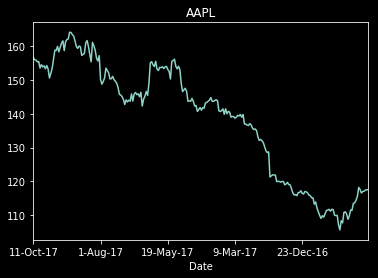

In [34]:
apple_data['Close'].plot()
plt.title('AAPL')